In [20]:
# Inserts Used for Skew-T
%matplotlib inline
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units
import metpy.plots as plots
import metpy.calc as mpcalc
from metpy.plots import Hodograph
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Date and Station.
date = datetime(2013, 5, 20, 18)
station = 'OUN' \

df = WyomingUpperAir.request_data(date, station)

In [30]:
# Variables
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])
height = df['height'].values * units(df.units['height'])

4468.383718309168 joule / kilogram
0.0 joule / kilogram


Text(0.15, 0.18, ' CAPE 4468.4 joule / kilogram \n CIN 0.0 joule / kilogram ')

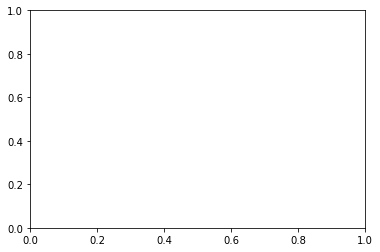

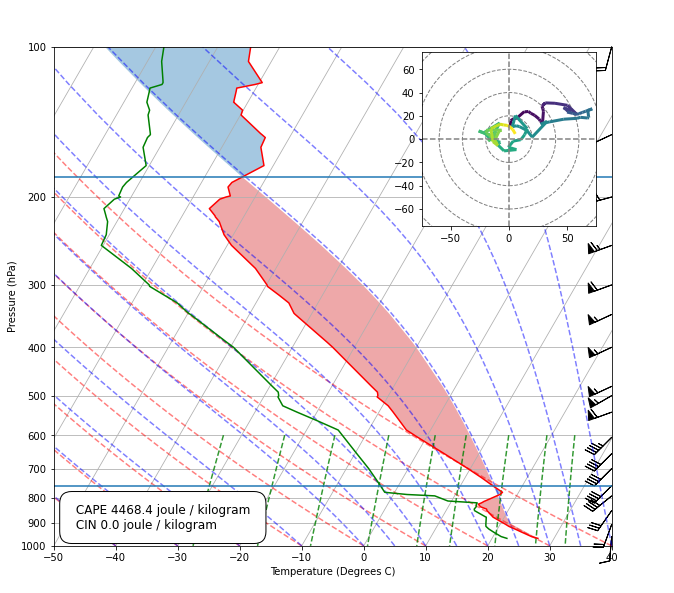

In [41]:
#plt.title('')

fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')

interval = np.arange(100,1000,50) * units.hPa  
idx = mpcalc.resample_nn_1d(p, interval)
skew.plot_barbs(p[idx], u[idx], v[idx])   

skew.ax.set_ylim(1000,100) 
skew.ax.set_xlim(-50,40)   

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.xlabel("Temperature (Degrees C)")
plt.ylabel("Pressure (hPa)")

parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])

skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)

lfc_p, lfc_t = mpcalc.lfc(p, T, Td)
el_p, el_t = mpcalc.el(p, T, Td)

if lfc_p:
    skew.ax.axhline(lfc_p)
    
if el_p:
    skew.ax.axhline(el_p)

    ax_hod = inset_axes(skew.ax, '35%', '35%', loc=1)
h = Hodograph(ax_hod, component_range=75.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, height);

parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])
cape, cin = mpcalc.cape_cin(p, T, Td, parcel_path) 

print(cape)
print(cin)

plt.figtext(0.15,0.18,f' CAPE {cape:.1f} \n CIN {cin:.1f} ',size=12,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))
ax_hod = inset_axes(skew.ax, '35%', '35%', loc='upper right', bbox_transform=skew.ax.transAxes, 
                 bbox_to_anchor=(-0.05, 0., 1, 1)) 


